# 图像特效-漫画效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [4]:
def cartoon(src):
    rgb = src.copy()
    # 1.二值化图像作为Mask
    edge_mask = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    edge_mask = cv2.medianBlur(edge_mask,7)
    edge_mask = cv2.adaptiveThreshold(edge_mask, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 4)
    
    #使用双边滤波
    for i in range(10):
        rgb = cv2.bilateralFilter(rgb,10,10,10)
    edge_mask = cv2.cvtColor(edge_mask,cv2.COLOR_GRAY2RGB)
    # 使用Mask
    rgb = cv2.bitwise_and(rgb,edge_mask)
    return rgb
    

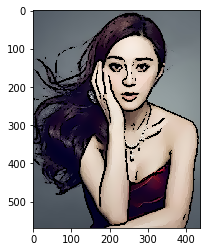

In [5]:
dst = cartoon(rgb)
plt.imshow(dst)